In [2]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from onix.papers.axion_2024.lomb_scargle import frequency_sensitivity_from_experiment_times


In [3]:
raw_data = np.load("raw_data.npz")
start_times = raw_data["start_times"]
end_times = raw_data["end_times"]
Zs = raw_data["Zs"]
W_Ts = raw_data["W_Ts"]

center_times = (start_times + end_times) / 2
center_time_offset = center_times[0]
center_time_offsetted = center_times - center_time_offset
center_time_offsetted_h = center_time_offsetted / 3600
cycle_times = end_times - start_times
num_of_cycles = len(start_times)
total_duration = end_times[-1] - start_times[0]
delta_W_Ts = W_Ts - np.average(W_Ts)

cycle_time_avg = np.average(cycle_times)
cycle_frequency_avg = 1 / cycle_time_avg
W_T_unc = np.std(W_Ts) / np.sqrt(num_of_cycles)

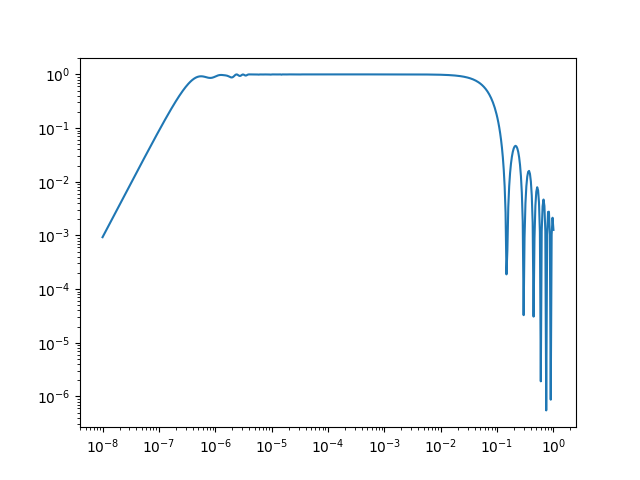

In [5]:
freqs_test = np.logspace(-8, 0, 500)
sensitivity_func = frequency_sensitivity_from_experiment_times(start_times, end_times, freqs_test)
fig, ax = plt.subplots()
ax.plot(freqs_test, sensitivity_func(freqs_test))
ax.set_xscale("log")
ax.set_yscale("log")
plt.show()

In [6]:
np.savez(
    "frequency_sensitivities.npz",
    freqs_test=freqs_test,
    sensitivities=sensitivity_func(freqs_test),
)